# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd
import requests
import json


In [2]:
we_rate_dogs = pd.read_csv('twitter-archive-enhanced.csv',header=0)


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
response = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
with open('image_prediction.tsv', 'wb') as file:
    file.write(response.content)

In [4]:
image_predictions = pd.read_csv('image_prediction.tsv', sep="\t", header=0)

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = we_rate_dogs.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [5]:
import json
listt = []
# with open('tweet_json.txt', encoding='utf-8') as file:
with open('tweet_json.txt', encoding='utf-8') as file:
    for line in file.readlines():
        line = json.loads(line)
        idd = line['id']
        created_at = line['created_at']
        retweet_count = line['retweet_count']
        favorite_count = line['favorite_count']
        listt.append({'tweet_id':idd, 'favorite_count':favorite_count,'retweet_count': retweet_count, 'created_at' : created_at})

        
additional_tweets =pd.DataFrame(listt, columns=['tweet_id', 'favorite_count', 'retweet_count', 'created_at'])

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [6]:
we_rate_dogs

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [7]:
we_rate_dogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [8]:
we_rate_dogs.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [9]:
we_rate_dogs[we_rate_dogs.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [10]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [11]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [12]:
image_predictions[image_predictions.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [13]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [14]:
additional_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
tweet_id          2354 non-null int64
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
created_at        2354 non-null object
dtypes: int64(3), object(1)
memory usage: 73.6+ KB


In [15]:
additional_tweets.head()

,tweet_id,favorite_count,retweet_count,created_at
0,892420643555336193,39467,8853,Tue Aug 01 16:23:56 +0000 2017
1,892177421306343426,33819,6514,Tue Aug 01 00:17:27 +0000 2017
2,891815181378084864,25461,4328,Mon Jul 31 00:18:03 +0000 2017
3,891689557279858688,42908,8964,Sun Jul 30 15:58:51 +0000 2017
4,891327558926688256,41048,9774,Sat Jul 29 16:00:24 +0000 2017


In [16]:
additional_tweets.describe()

,tweet_id,favorite_count,retweet_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,8080.968564,3164.797366
std,6.852812e+16,11814.771334,5284.770364
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,1415.000000,624.500000
50%,7.194596e+17,3603.500000,1473.500000
75%,7.993058e+17,10122.250000,3652.000000
max,8.924206e+17,132810.000000,79515.000000


### Quality issues
1. missing values in we_rate_dogs columns (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls)

2. source column in the weratedogs csv has html tags

3. Timestamp column in weratedogs has invalid datetime format

4. The ID fields, like tweet_id in the three datasets should be objects and not numeric since they are not required to perform any calculations

5. Retweets and Favorite Count: retweet_count and favorite_count should be integers, not floats.

6. rating_numerator column should be of float data type.The rating denominator is of int data type however it is preffered as float data type

7. Rating numerator  and rating denominator have anomalous values (1776, 170). 

8. In the name column, there are several values that are not dog names, like 'a', 'the', 'such', etc.

9. In image predictions csv, columns p1, p2, p3 separates two or three names with an underscore

10. Invaid date-time format in additional tweets dataframe


### Tidiness issues
1.The 4 different columns doggo, floofer, pupper and puppo, are all relative to the same variable that identifies the stage of dog.

2.The melted dataframe have 2 columns with the same attribute

3.The merged df1 dataset has null values in some columns.This does not follow the law that each variable forms a column


## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [17]:
# Make copies of original pieces of data
we_rate_dogs_copy =we_rate_dogs.copy()
image_predictions_copy = image_predictions.copy()
additional_tweets_copy = additional_tweets.copy()

### Issue #1:

### Define: drop columns with missing values more than 50%. Fill missing values in the expanded_urls column with a random url

#### Code:

In [18]:
#drop columns with missing values more than 50%.
columns = ["in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp"]
print(we_rate_dogs_copy.isna().mean().mul(100))
we_rate_dogs_copy.drop(columns=columns, axis=1, inplace=True)

#Fill missing values in the expanded_urls column with a random url

random_url = we_rate_dogs_copy.expanded_urls[0]
we_rate_dogs_copy['expanded_urls'].fillna(random_url, inplace=True)

tweet_id                       0.000000
in_reply_to_status_id         96.689304
in_reply_to_user_id           96.689304
timestamp                      0.000000
source                         0.000000
text                           0.000000
retweeted_status_id           92.317487
retweeted_status_user_id      92.317487
retweeted_status_timestamp    92.317487
expanded_urls                  2.504244
rating_numerator               0.000000
rating_denominator             0.000000
name                           0.000000
doggo                          0.000000
floofer                        0.000000
pupper                         0.000000
puppo                          0.000000
dtype: float64


#### Test:

In [19]:
we_rate_dogs_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null object
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2356 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: int64(3), object(9)
memory usage: 221.0+ KB


### Issue #2:

#### Define: Remove html tags in the source column to only have the url using the string split method.

#### Code

In [20]:
#create a slicing fun and apply to the dataframe
def slicing(row):
    return row[1][:-4]
we_rate_dogs_copy['source'] = we_rate_dogs_copy['source'].str.split(">", 1).apply(slicing)

#### Test

In [21]:
we_rate_dogs_copy.source

0       Twitter for iPhone
1       Twitter for iPhone
2       Twitter for iPhone
3       Twitter for iPhone
4       Twitter for iPhone
5       Twitter for iPhone
6       Twitter for iPhone
7       Twitter for iPhone
8       Twitter for iPhone
9       Twitter for iPhone
10      Twitter for iPhone
11      Twitter for iPhone
12      Twitter for iPhone
13      Twitter for iPhone
14      Twitter for iPhone
15      Twitter for iPhone
16      Twitter for iPhone
17      Twitter for iPhone
18      Twitter for iPhone
19      Twitter for iPhone
20      Twitter for iPhone
21      Twitter for iPhone
22      Twitter for iPhone
23      Twitter for iPhone
24      Twitter for iPhone
25      Twitter for iPhone
26      Twitter for iPhone
27      Twitter for iPhone
28      Twitter for iPhone
29      Twitter for iPhone
               ...        
2326    Twitter for iPhone
2327    Twitter for iPhone
2328    Twitter for iPhone
2329    Twitter for iPhone
2330    Twitter for iPhone
2331    Twitter for iPhone
2

### Issue #3:

#### Define: Timestamp  has invalid datetime format.The +0000 is not necessary.The string slicemethod will be used to format datetime string to a valid format

#### Code

In [22]:
def time_slicing(row):
    return row[:-6]
we_rate_dogs_copy.timestamp = we_rate_dogs_copy.timestamp.apply(time_slicing)

#### Test

In [23]:
we_rate_dogs_copy.timestamp


0       2017-08-01 16:23:56
1       2017-08-01 00:17:27
2       2017-07-31 00:18:03
3       2017-07-30 15:58:51
4       2017-07-29 16:00:24
5       2017-07-29 00:08:17
6       2017-07-28 16:27:12
7       2017-07-28 00:22:40
8       2017-07-27 16:25:51
9       2017-07-26 15:59:51
10      2017-07-26 00:31:25
11      2017-07-25 16:11:53
12      2017-07-25 01:55:32
13      2017-07-25 00:10:02
14      2017-07-24 17:02:04
15      2017-07-24 00:19:32
16      2017-07-23 00:22:39
17      2017-07-22 16:56:37
18      2017-07-22 00:23:06
19      2017-07-21 01:02:36
20      2017-07-20 16:49:33
21      2017-07-19 16:06:48
22      2017-07-19 03:39:09
23      2017-07-19 00:47:34
24      2017-07-18 16:08:03
25      2017-07-18 00:07:08
26      2017-07-17 16:17:36
27      2017-07-16 23:58:41
28      2017-07-16 20:14:00
29      2017-07-15 23:25:31
               ...         
2326    2015-11-17 00:24:19
2327    2015-11-17 00:06:54
2328    2015-11-16 23:23:41
2329    2015-11-16 21:54:18
2330    2015-11-16 2

### Issue #4:

### Define: change the tweet id column datatype of the three datasets from int/float to object data type using astype method.

#### Code:

In [25]:
we_rate_dogs_copy["tweet_id"] = we_rate_dogs_copy["tweet_id"].astype(str)

image_predictions_copy["tweet_id"] = image_predictions_copy["tweet_id"].astype(str)

additional_tweets_copy["tweet_id"] = additional_tweets_copy["tweet_id"].astype(str)

#### Test

In [26]:
print(we_rate_dogs_copy.tweet_id.dtype)
print(image_predictions_copy.tweet_id.dtype)
print(additional_tweets_copy.tweet_id.dtype)

object
object
object


In [27]:
we_rate_dogs_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2356 non-null object
timestamp             2356 non-null object
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2356 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: int64(2), object(10)
memory usage: 221.0+ KB


### Issue #5:

#### Define: Retweets and Favorite Count: retweet_count and favorite_count should be integers, not floats.Using the astype method we will change the format to int


#### Code

In [28]:
def change_int(col):
    return col.astype(int)

columns =['retweet_count', 'favorite_count']
additional_tweets_copy[columns] = additional_tweets_copy[columns].apply(change_int)

#### Test


In [29]:
additional_tweets_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
tweet_id          2354 non-null object
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
created_at        2354 non-null object
dtypes: int64(2), object(2)
memory usage: 73.6+ KB


### Issue #6:

### Define:rating_numerator column should be of float data type.The rating denominator is of int data type however it is preffered as float data type.we will use the astype method

#### Code:

In [30]:
we_rate_dogs_copy.rating_numerator = we_rate_dogs_copy.rating_numerator.astype(float)
we_rate_dogs_copy.rating_denominator = we_rate_dogs_copy.rating_denominator.astype(float)

#### Test:

In [31]:
we_rate_dogs_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2356 non-null object
timestamp             2356 non-null object
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2356 non-null object
rating_numerator      2356 non-null float64
rating_denominator    2356 non-null float64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: float64(2), object(10)
memory usage: 221.0+ KB


### Issue #7:

### Define: Rating numerator beeing 1776 and rating denominator being 170 seems unrealistic. we will drop this row using the drop

#### Code


In [32]:
#we_rate_dogs_copy.query('rating_numerator == 1776') this gets index of the row which is 979
#we can then drop using the index

we_rate_dogs_copy = we_rate_dogs_copy.drop(axis=0, index=[979])

#### Test


In [33]:
we_rate_dogs_copy.query('rating_numerator == 1776') 

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #8:

### Define: In the name column, there are several values that are not dog names, like 'a', 'the', 'such', etc. we will drop duplicates then remove  row  that have names which dont start with a capital letter.

#### Code:

In [34]:
# drop duoplicated names
we_rate_dogs_copy = we_rate_dogs_copy.drop_duplicates(['name'])


In [35]:
# get valid names
def get_valid_name(row):
    if not row[0].islower():
        return row
    
we_rate_dogs_copy.name = we_rate_dogs_copy.name.apply(get_valid_name)

In [36]:
# drop rows that hav nulls
we_rate_dogs_copy = we_rate_dogs_copy.dropna(axis = 0, how ='any')

#### Test:

In [37]:
we_rate_dogs_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 932 entries, 0 to 2315
Data columns (total 12 columns):
tweet_id              932 non-null object
timestamp             932 non-null object
source                932 non-null object
text                  932 non-null object
expanded_urls         932 non-null object
rating_numerator      932 non-null float64
rating_denominator    932 non-null float64
name                  932 non-null object
doggo                 932 non-null object
floofer               932 non-null object
pupper                932 non-null object
puppo                 932 non-null object
dtypes: float64(2), object(10)
memory usage: 94.7+ KB


### Issue #9:

#### Define:In image predictions csv, replace the underscore with an empty space  columns p1, p2, p3 using the str.replace method

#### Code:

In [38]:
columns = ['p1', 'p2', 'p3']
def replace(row):
    row.replace("_", " ")

for col in columns:
    image_predictions_copy[col] = image_predictions_copy[col].str.replace("_", " ")

#### Test:

In [39]:
image_predictions_copy[columns]

,p1,p2,p3
0,Welsh springer spaniel,collie,Shetland sheepdog
1,redbone,miniature pinscher,Rhodesian ridgeback
2,German shepherd,malinois,bloodhound
3,Rhodesian ridgeback,redbone,miniature pinscher
4,miniature pinscher,Rottweiler,Doberman
5,Bernese mountain dog,English springer,Greater Swiss Mountain dog
6,box turtle,mud turtle,terrapin
7,chow,Tibetan mastiff,fur coat
8,shopping cart,shopping basket,golden retriever
9,miniature poodle,komondor,soft-coated wheaten terrier


### Issue #10:

### Define:In additional tweets csv, the created at column has invalid date time format .will use the datetime module to change its format

#### Code

In [40]:
import datetime

def change_date(each_date):
    new = datetime.datetime.strptime(each_date, "%a %b %V %X %z %G")
    formatted_date = datetime.datetime.strftime(new, "%Y-%m-%d %X")
    return formatted_date

additional_tweets_copy.created_at = additional_tweets_copy.created_at.apply(change_date)


#### Test

In [41]:
additional_tweets_copy.created_at

0       2017-01-03 16:23:56
1       2017-01-03 00:17:27
2       2017-07-31 00:18:03
3       2017-07-30 15:58:51
4       2017-07-22 16:00:24
5       2017-07-22 00:08:17
6       2017-07-14 16:27:12
7       2017-07-14 00:22:40
8       2017-07-06 16:25:51
9       2017-06-28 15:59:51
10      2017-06-28 00:31:25
11      2017-06-20 16:11:53
12      2017-06-20 01:55:32
13      2017-06-20 00:10:02
14      2017-06-12 17:02:04
15      2017-06-12 00:19:32
16      2017-06-11 00:22:39
17      2017-06-03 16:56:37
18      2017-06-03 00:23:06
19      2017-05-18 16:49:33
20      2017-05-10 16:06:48
21      2017-05-10 03:39:09
22      2017-05-10 00:47:34
23      2017-05-02 16:08:03
24      2017-05-02 00:07:08
25      2017-04-24 16:17:36
26      2017-04-23 23:58:41
27      2017-04-23 20:14:00
28      2017-04-15 23:25:31
29      2017-04-15 16:51:35
               ...         
2324    2015-04-21 00:24:19
2325    2015-04-21 00:06:54
2326    2015-04-13 23:23:41
2327    2015-04-13 21:54:18
2328    2015-04-13 2

### Issue #11:

### Define:melt columns doggo, floofer, pupper and puppo to a single column named dog_stage

#### Code


In [42]:
we_rate_dogs_copy = pd.melt(we_rate_dogs_copy, id_vars=['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name'],
                           var_name='dog_stage')


#### Test

In [43]:
we_rate_dogs_copy.tail(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,value
3723,666996132027977728,2015-11-18 15:07:24,Twitter for iPhone,This is Carll. He wants to be a donkey. But al...,https://twitter.com/dog_rates/status/666996132...,10.0,10.0,Carll,puppo,None
3724,666804364988780544,2015-11-18 02:25:23,Twitter for iPhone,This is Jockson. He is a Pinnacle Sagittarius....,https://twitter.com/dog_rates/status/666804364...,8.0,10.0,Jockson,puppo,None
3725,666776908487630848,2015-11-18 00:36:17,Twitter for iPhone,This is Josep. He is a Rye Manganese mix. Can ...,https://twitter.com/dog_rates/status/666776908...,5.0,10.0,Josep,puppo,None
3726,666739327293083650,2015-11-17 22:06:57,Twitter for iPhone,This is Lugan. He is a Bohemian Rhapsody. Very...,https://twitter.com/dog_rates/status/666739327...,10.0,10.0,Lugan,puppo,None
3727,666691418707132416,2015-11-17 18:56:35,Twitter for iPhone,This is Christoper. He is a spotted Penne. Can...,https://twitter.com/dog_rates/status/666691418...,8.0,10.0,Christoper,puppo,None


### Issue #11:

### Define: get the non-null values of the melted df and filter data which value is ot None .Then drop the value column 

In [44]:
we_rate_dogs_copy= we_rate_dogs_copy[we_rate_dogs_copy.notna()]
we_rate_dogs_copy = we_rate_dogs_copy[we_rate_dogs_copy['value'] != 'None']
we_rate_dogs_copy.drop(we_rate_dogs_copy.columns[[9]], axis=1, inplace=True)

#### Test

In [45]:
we_rate_dogs_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135 entries, 8 to 3290
Data columns (total 9 columns):
tweet_id              135 non-null object
timestamp             135 non-null object
source                135 non-null object
text                  135 non-null object
expanded_urls         135 non-null object
rating_numerator      135 non-null float64
rating_denominator    135 non-null float64
name                  135 non-null object
dog_stage             135 non-null object
dtypes: float64(2), object(7)
memory usage: 10.5+ KB


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [46]:
# merge two datasets(we rate dogs and image predictions)
df1 =pd.merge(we_rate_dogs_copy, image_predictions_copy, how="left")

In [49]:
# remove nulls
df1 =df1.dropna(axis = 0, how ='any')

In [50]:
df2 = pd.merge(df1, additional_tweets_copy, how="left")

In [51]:
# finally store to our twitter archive master csv
df2.to_csv("twitter_archive_master.csv", index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [52]:
master_csv=pd.read_csv("twitter_archive_master.csv")
master_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 23 columns):
tweet_id              121 non-null int64
timestamp             121 non-null object
source                121 non-null object
text                  121 non-null object
expanded_urls         121 non-null object
rating_numerator      121 non-null float64
rating_denominator    121 non-null float64
name                  121 non-null object
dog_stage             121 non-null object
jpg_url               121 non-null object
img_num               121 non-null float64
p1                    121 non-null object
p1_conf               121 non-null float64
p1_dog                121 non-null bool
p2                    121 non-null object
p2_conf               121 non-null float64
p2_dog                121 non-null bool
p3                    121 non-null object
p3_conf               121 non-null float64
p3_dog                121 non-null bool
favorite_count        121 non-null int64
retweet_count  

In [53]:
master_csv.describe()

,tweet_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,favorite_count,retweet_count
count,1.210000e+02,121.000000,121.0,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000
mean,7.624080e+17,11.123967,10.0,1.214876,0.639209,0.132579,0.051229,9321.338843,3093.322314
std,7.188507e+16,1.705727,0.0,0.565783,0.273973,0.109501,0.050698,9359.461820,4527.910847
min,6.721600e+17,6.000000,10.0,1.000000,0.059033,0.000014,0.000006,0.000000,103.000000
25%,6.866830e+17,10.000000,10.0,1.000000,0.413535,0.038299,0.009840,2613.000000,912.000000
50%,7.500114e+17,11.000000,10.0,1.000000,0.700466,0.106227,0.035528,5575.000000,1972.000000
75%,8.264768e+17,12.000000,10.0,1.000000,0.858764,0.202444,0.079433,13075.000000,3472.000000
max,8.902403e+17,14.000000,10.0,4.000000,0.999962,0.451038,0.227677,48410.000000,42228.000000


### Insights:
1. prediction confidence decreases over time in increase in number of predictions

2. Barney had the most favorite count
3. The model prediction was accurate most of the time as the number of true predictions was more than the false ones

### Visualization

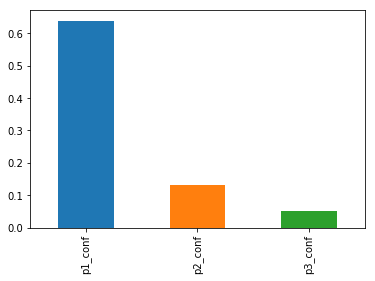

In [56]:
### visualization of each prediction confidence
import matplotlib as plt
%matplotlib inline


master_csv[['p1_conf', 'p2_conf', 'p3_conf']].mean().plot(kind="bar")